Found 320 files belonging to 4 classes.
Found 320 files belonging to 4 classes.
Epoch 1/100
5/5 [==============================] - 15s 305ms/step - loss: nan - accuracy: 0.2594 - val_loss: nan - val_accuracy: 0.2500
Epoch 2/100
5/5 [==============================] - 2s 266ms/step - loss: nan - accuracy: 0.2500 - val_loss: nan - val_accuracy: 0.2500
Epoch 3/100
5/5 [==============================] - 2s 265ms/step - loss: nan - accuracy: 0.2500 - val_loss: nan - val_accuracy: 0.2500
Epoch 4/100
5/5 [==============================] - 2s 256ms/step - loss: nan - accuracy: 0.2500 - val_loss: nan - val_accuracy: 0.2500
Epoch 5/100
5/5 [==============================] - 2s 259ms/step - loss: nan - accuracy: 0.2500 - val_loss: nan - val_accuracy: 0.2500
Epoch 6/100
5/5 [==============================] - 2s 255ms/step - loss: nan - accuracy: 0.2500 - val_loss: nan - val_accuracy: 0.2500
Epoch 7/100
5/5 [==============================] - 2s 258ms/step - loss: nan - accuracy: 0.2500 - val_loss: n

<Figure size 720x720 with 0 Axes>

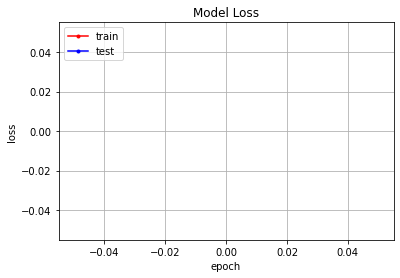

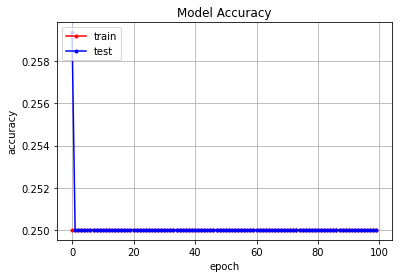


Total Training Time for the model:  0h 3m 41s


In [2]:
# PRoject - AlexNet

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from tensorflow import keras
from keras import layers
from keras.models import Model
import os

import time, datetime

start = datetime.datetime.now()

time.sleep(10)




# load
# data_dir = './HW1-1_data'
data_dir = './images/'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))

# load
# load
# train_data_dir = './MURA/train'
# train_data_dir = pathlib.Path(train_data_dir)
# image_count_train = len(list(train_data_dir.glob('*/*.jpg')))

# test_data_dir = './MURA/valid'
# test_data_dir = pathlib.Path(test_data_dir)
# image_count_test = len(list(test_data_dir.glob('*/*.jpg')))

# data prep
batch_size = 64
img_height = 256
img_width = 256
trainX = tf.keras.utils.image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width), batch_size=batch_size)
testX = tf.keras.utils.image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width), batch_size=batch_size)
classes = trainX.class_names
plt.figure(figsize=(10, 10))

# model
def alexnet(in_shape=(256, 256,3), n_classes=2):
  in_layer = layers.Input(in_shape)
  conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
  pool1 = layers.MaxPool2D(3, 2)(conv1)
  conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
  pool2 = layers.MaxPool2D(3, 2)(conv2)
  conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
  conv4 = layers.Conv2D(256, 3, strides=1, padding ='same', activation='relu')(conv3)
  pool3 = layers.MaxPool2D(3, 2)(conv4)
  flattened = layers.Flatten()(pool3)
  dense1 = layers.Dense(4096, activation='relu')(flattened)
  drop1 = layers.Dropout(0.5)(dense1)
  dense2 = layers.Dense(4096, activation='relu')(drop1)
  drop2 = layers.Dropout(0.5)(dense2)
  preds = layers.Dense(n_classes, activation='softmax')(drop2)
  model = Model(in_layer, preds)
  return model

model = alexnet()
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(trainX, validation_data=testX, epochs=100)

# y_vloss = history.history['val_loss']
# y_loss = history.history['loss']
# y_acc = history.history['accuracy']
# y_vacc = history.history['val_accuracy']

# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
# ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
# ax1.grid()
# plt.setp(ax1, xlabel='epoch', ylabel='loss')

# ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
# ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
# ax2.grid()
# plt.setp(ax2, xlabel='epoch', ylabel='accuracy')

# plt.show()


y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']


fig, (ax1) = plt.subplots(1)
ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.title('Model Loss')
plt.setp(ax1, xlabel='epoch', ylabel='loss')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./loss per epochs for AlexNet-graph.jpg")
plt.show()

fig, (ax2) = plt.subplots(1)
ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.title('Model Accuracy') 
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./accuracy per epochs for AlexNet-graph.jpg")
plt.show()



end = datetime.datetime.now()
diff = (end - start)
datetime.timedelta(seconds=10, microseconds=885206)


diff_seconds = int(diff.total_seconds())
minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"
print("\nTotal Training Time for the model: ", hms)


